In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

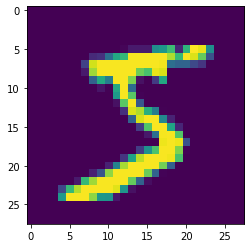

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [12]:
28*28

784

In [13]:
784/2

392.0

In [14]:
#as there is no way to actually measure generalisation/performace of 
#autoencoders we attempt to improve learning by stacking them 
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [15]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28*28,activation='sigmoid'))#because case is binary, looks like the image or doesn't...
decoder.add(Reshape([28,28]))# to get back original shape

In [16]:
autoencoder=Sequential([encoder,decoder])

In [17]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(lr=1.5),
                   metrics=['accuracy'])

In [18]:
autoencoder.fit(X_train,X_train,epochs=5,
                validation_data=(X_test,X_test))# pseudo validation because train/test split is not fundamental to this process...
                                                #it might just give you an idea of how the model generalises i.e. performs on unseen data

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 55s 919us/sample - loss: 0.2422 - accuracy: 0.7906 - val_loss: 0.2059 - val_accuracy: 0.7931
Epoch 2/5
60000/60000 [==============================] - 42s 708us/sample - loss: 0.1875 - accuracy: 0.7977 - val_loss: 0.1660 - val_accuracy: 0.8002
Epoch 3/5
60000/60000 [==============================] - 48s 799us/sample - loss: 0.1625 - accuracy: 0.8014 - val_loss: 0.1551 - val_accuracy: 0.8018
Epoch 4/5
60000/60000 [==============================] - 48s 806us/sample - loss: 0.1524 - accuracy: 0.8031 - val_loss: 0.1484 - val_accuracy: 0.8004
Epoch 5/5
60000/60000 [==============================] - 52s 869us/sample - loss: 0.1444 - accuracy: 0.8045 - val_loss: 0.1395 - val_accuracy: 0.8055


In [19]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


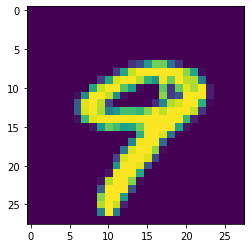

after passing through autoencoder


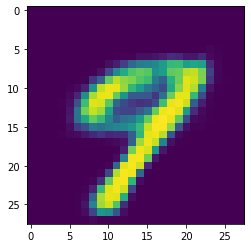

In [23]:
n=9
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('after passing through autoencoder')
plt.imshow(passed_images[n])